Os dados de trafego foram obtidos por dados abertos da ANTT
https://dados.antt.gov.br/dataset/volume-trafego-equivalente-praca-pedagio

In [32]:
import datetime as dt
import pandas as pd
import os
import glob
import numpy as np


def unir_arquivos(url):
    diretorio_atual = os.getcwd()

    extension = 'csv'
    os.chdir(url)
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

    dfs = []
    for filename in all_filenames:
        df_temp = pd.read_csv(filename, sep=';', encoding='latin1')
        dfs.append(df_temp)

    df = pd.concat(dfs, ignore_index=True)

    os.chdir(diretorio_atual)

    return df

df_pedagio = unir_arquivos('C:/Users/Public/Documents/PythonScripts/Mestrado/DadosIniciais/Volume_Trafego')


In [33]:
df_pedagio.head()

,concessionaria,mes_ano,sentido,praca,categoria,tipo_de_veiculo,volume_total,multiplicador_de_tarifa,volume_veiculo_equivalente,tipo_de_cobranca
0,RODOVIA DO AÇO,01-01-2010,Decrescente,"Praça 01 BR-393/RJ km 125,00",Categoria 1,Passeio,44146,1,44146,NaN
1,RODOVIA DO AÇO,01-01-2010,Crescente,"Praça 01 BR-393/RJ km 125,00",Categoria 1,Passeio,35771,1,35771,NaN
2,RODOVIA DO AÇO,01-02-2010,Decrescente,"Praça 01 BR-393/RJ km 125,00",Categoria 1,Passeio,33455,1,33455,NaN
3,RODOVIA DO AÇO,01-02-2010,Crescente,"Praça 01 BR-393/RJ km 125,00",Categoria 1,Passeio,27109,1,27109,NaN
4,RODOVIA DO AÇO,01-03-2010,Decrescente,"Praça 01 BR-393/RJ km 125,00",Categoria 1,Passeio,31677,1,31677,NaN


Analise das concessionarias presentes no arquivo. Como a Arteris possui apenas 5 concessionarias presentes nos dados, as demais foram eliminadas

In [34]:
df_pedagio.concessionaria.value_counts()

concessionaria
CONCEBRA                                 198116
NOVADUTRA                                 27794
VIA 040                                   25960
AUTOPISTA FERNÃO DIAS                     24800
MSVIA                                     22176
CRO                                       21475
VIA BAHIA                                 20160
AUTOPISTA REGIS BITTENCOURT               18600
ECOSUL                                    15600
AUTOPISTA PLANALTO SUL                    15500
AUTOPISTA LITORAL SUL                     15500
ECO050                                    15231
ECO101 CONCESSIONARIA DE RODOVIAS S/A     14560
AUTOPISTA FLUMINENSE                      14230
TRANSBRASILIANA                           12480
CRT                                       11016
RODOVIA DO AÇO                             9300
CONCER                                     9300
Concebra                                   7901
VIA SUL                                    7728
ECOVIAS DO CERRADO       

In [35]:
concessionaria = {'AUTOPISTA FLUMINENSE': 'Fluminense', 'Autopista Fluminense': 'Fluminense',
                      'AUTOPISTA PLANALTO SUL': 'Planalto Sul', 'Autopista Planalto Sul': 'Planalto Sul',
                      'AUTOPISTA FERNÃO DIAS': 'Fernão Dias',
                      'AUTOPISTA LITORAL SUL': 'Litoral Sul', 'Autopista Litoral Sul': 'Litoral Sul',
                      'AUTOPISTA REGIS BITTENCOURT': 'Régis Bittencourt',
                      'Autopista Regis Bittencourt': 'Régis Bittencourt'}
df_pedagio['concessionaria'] = df_pedagio['concessionaria'].replace(concessionaria)

df_pedagio = df_pedagio.query('concessionaria == "Fernão Dias" or concessionaria == "Fluminense" or concessionaria == "Litoral Sul" or concessionaria == "Planalto Sul" or concessionaria == "Régis Bittencourt"')

In [36]:
df_pedagio['concessionaria'].value_counts()

concessionaria
Fernão Dias          24800
Régis Bittencourt    18720
Planalto Sul         15600
Litoral Sul          15600
Fluminense           14330
Name: count, dtype: int64

tratando a coluna de data

In [37]:
df_pedagio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89050 entries, 720 to 397000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   concessionaria              89050 non-null  object
 1   mes_ano                     89050 non-null  object
 2   sentido                     89050 non-null  object
 3   praca                       89050 non-null  object
 4   categoria                   89050 non-null  object
 5   tipo_de_veiculo             89050 non-null  object
 6   volume_total                89050 non-null  object
 7   multiplicador_de_tarifa     89050 non-null  object
 8   volume_veiculo_equivalente  89050 non-null  object
 9   tipo_de_cobranca            55010 non-null  object
dtypes: object(10)
memory usage: 7.5+ MB


In [38]:
df_pedagio['mes_ano'] = df_pedagio['mes_ano'].str.replace('/', '-')
df_pedagio['mes_ano'] = pd.to_datetime(df_pedagio['mes_ano'])
df_pedagio['ano'] = df_pedagio['mes_ano'].dt.year
df_pedagio['mes'] = df_pedagio['mes_ano'].dt.day
df_pedagio.head()

,concessionaria,mes_ano,sentido,praca,categoria,tipo_de_veiculo,volume_total,multiplicador_de_tarifa,volume_veiculo_equivalente,tipo_de_cobranca,ano,mes
720,Fluminense,2010-01-01,Crescente,"Praça 01 BR-101/RJ km 40,54",Categoria 1,Passeio,71523,1,71523,NaN,2010,1
721,Fluminense,2010-01-01,Decrescente,"Praça 01 BR-101/RJ km 40,54",Categoria 1,Passeio,63076,1,63076,NaN,2010,1
722,Fluminense,2010-01-02,Crescente,"Praça 01 BR-101/RJ km 40,54",Categoria 1,Passeio,55815,1,55815,NaN,2010,2
723,Fluminense,2010-01-02,Decrescente,"Praça 01 BR-101/RJ km 40,54",Categoria 1,Passeio,53372,1,53372,NaN,2010,2
724,Fluminense,2010-01-03,Crescente,"Praça 01 BR-101/RJ km 40,54",Categoria 1,Passeio,41008,1,41008,NaN,2010,3


In [39]:
df_pedagio['sentido'] = df_pedagio['sentido'].replace({'Decrescente': 'N', 'Decrescente ': 'N', 'Crescente': 'S', 'Crescente ': 'S'})

Ajustando praça de pedagio

In [40]:
df_pedagio['praca'].head()

720    Praça 01 BR-101/RJ km 40,54
721    Praça 01 BR-101/RJ km 40,54
722    Praça 01 BR-101/RJ km 40,54
723    Praça 01 BR-101/RJ km 40,54
724    Praça 01 BR-101/RJ km 40,54
Name: praca, dtype: object

In [41]:
def ajustando_praca(df):
    df.rename(columns={'praca': 'info_praca'}, inplace=True)
    df['praca'] = df['info_praca'].str[:8]
    df['rodovia'] = df['info_praca'].str.rsplit(' ').str[2]
    df['km_praca'] = df['info_praca'].str.rsplit(' ').str[-1]
    df.loc[(df['km_praca'] == ""), 'km_praca'] = df['info_praca'].str.rsplit(' ').str[4]
    
    return df

df_pedagio = ajustando_praca(df_pedagio)

In [42]:
df_pedagio[['info_praca', 'praca', 'rodovia', 'km_praca']]

,info_praca,praca,rodovia,km_praca
720,"Praça 01 BR-101/RJ km 40,54",Praça 01,BR-101/RJ,"40,54"
721,"Praça 01 BR-101/RJ km 40,54",Praça 01,BR-101/RJ,"40,54"
722,"Praça 01 BR-101/RJ km 40,54",Praça 01,BR-101/RJ,"40,54"
723,"Praça 01 BR-101/RJ km 40,54",Praça 01,BR-101/RJ,"40,54"
724,"Praça 01 BR-101/RJ km 40,54",Praça 01,BR-101/RJ,"40,54"
...,...,...,...,...
396996,"Praça 06 BR-116/PR km 57,10",Praça 06,BR-116/PR,"57,10"
396997,"Praça 06 BR-116/PR km 57,10",Praça 06,BR-116/PR,"57,10"
396998,"Praça 06 BR-116/PR km 57,10",Praça 06,BR-116/PR,"57,10"
396999,"Praça 06 BR-116/PR km 57,10",Praça 06,BR-116/PR,"57,10"


In [ ]:
def definindo_colunas(df):    
    df = df[['ano', 'mes', 'concessionaria', 'info_praca', 'rodovia', 'sentido', 'praca', 'km_praca', 'volume_total', 'multiplicador_de_tarifa', 'volume_veiculo_equivalente']]
    
    df[['volume_veiculo_equivalente', 'volume_total']] = df[['volume_veiculo_equivalente', 'volume_total']].map(lambda x: x.replace(',', '.') if isinstance(x, str) and ',' in x else x)
    df[['volume_veiculo_equivalente', 'volume_total']] = df[['volume_veiculo_equivalente', 'volume_total']].astype(float)
    
    return df

df_pedagio = definindo_colunas(df_pedagio)

Cada linha representa o numero equivalente e absoluto por tipo de veiculo por sentido por praça de pedágio. O objetivo é fazer com que cada linha seja a soma de todos os veiculos por sentido por praça de pedagio

In [44]:
def calculo_volume(df):
    df['Uniao'] = df['concessionaria'].astype(str) + '.' + df['praca'].astype(str) + '.' + df['ano'].astype(str) + '.' + df['mes'].astype(str) + '.' + df['sentido'].astype(str)

    df['Volume_Equivalente'] = df.groupby('Uniao')['volume_veiculo_equivalente'].transform('sum')
    df['Volume_Total'] = df.groupby('Uniao')['volume_total'].transform('sum')

    df.drop_duplicates(subset=['Uniao'], inplace=True)
    df.drop(columns=['info_praca', 'multiplicador_de_tarifa'], axis=1, inplace=True)

    return df

df_pedagio = calculo_volume(df_pedagio)

df_pedagio.head()

,ano,mes,concessionaria,rodovia,sentido,praca,km_praca,volume_total,volume_veiculo_equivalente,Uniao,Volume_Equivalente,Volume_Total
720,2010,1,Fluminense,BR-101/RJ,S,Praça 01,"40,54",71523.0,71523.0,Fluminense.Praça 01.2010.1.S,236052.0,115574.0
721,2010,1,Fluminense,BR-101/RJ,N,Praça 01,"40,54",63076.0,63076.0,Fluminense.Praça 01.2010.1.N,213827.0,103653.0
722,2010,2,Fluminense,BR-101/RJ,S,Praça 01,"40,54",55815.0,55815.0,Fluminense.Praça 01.2010.2.S,209904.5,96649.0
723,2010,2,Fluminense,BR-101/RJ,N,Praça 01,"40,54",53372.0,53372.0,Fluminense.Praça 01.2010.2.N,196223.0,91367.0
724,2010,3,Fluminense,BR-101/RJ,S,Praça 01,"40,54",41008.0,41008.0,Fluminense.Praça 01.2010.3.S,217523.5,86570.0


Filtrar apenas Litoral Sul, Fernão Dias e Regis Bittencourt

In [45]:
df_pedagio = df_pedagio.query('concessionaria == "Litoral Sul" or concessionaria == "Fernão Dias" or concessionaria == "Régis Bittencourt"')

#### Regressão logistica
alguns dados são outliers

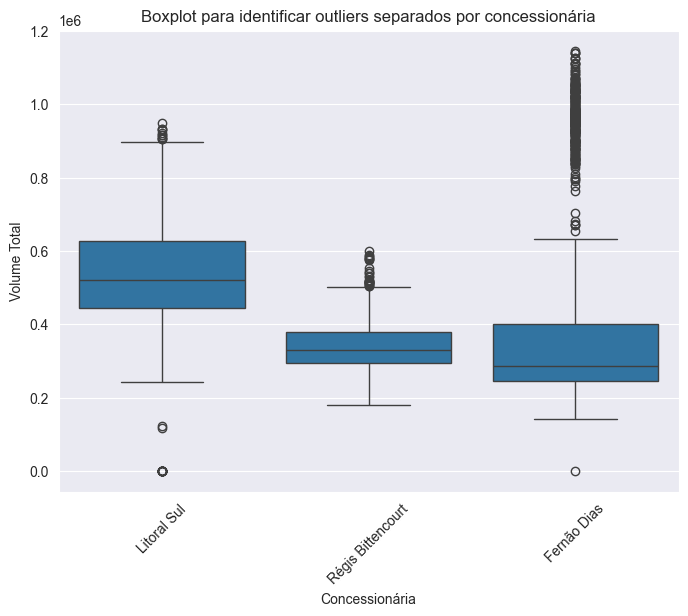

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='concessionaria', y='Volume_Total', data=df_pedagio)
plt.title("Boxplot para identificar outliers separados por concessionária")
plt.xlabel("Concessionária")
plt.ylabel("Volume Total")
plt.xticks(rotation=45)
plt.show()

Na Fernão Dias não faz sentido o valor tao baixo para o mes de junho de 2022, sendo zerado

In [47]:
df_pedagio.query('Volume_Total > 0 and Volume_Total < 2000 and concessionaria == "Fernão Dias"')

,ano,mes,concessionaria,rodovia,sentido,praca,km_praca,volume_total,volume_veiculo_equivalente,Uniao,Volume_Equivalente,Volume_Total
390852,2022,6,Fernão Dias,BR-381/MG,N,Praça 06,659,96.0,96.0,Fernão Dias.Praça 06.2022.6.N,713.5,265.0


In [48]:
df_pedagio.loc[(df_pedagio['Volume_Total'] > 0) & (df_pedagio['Volume_Total'] < 2000) & (df_pedagio['concessionaria']  == 'Fernão Dias'), 'Volume_Total'] = 0.0

Analisando os valores superiores

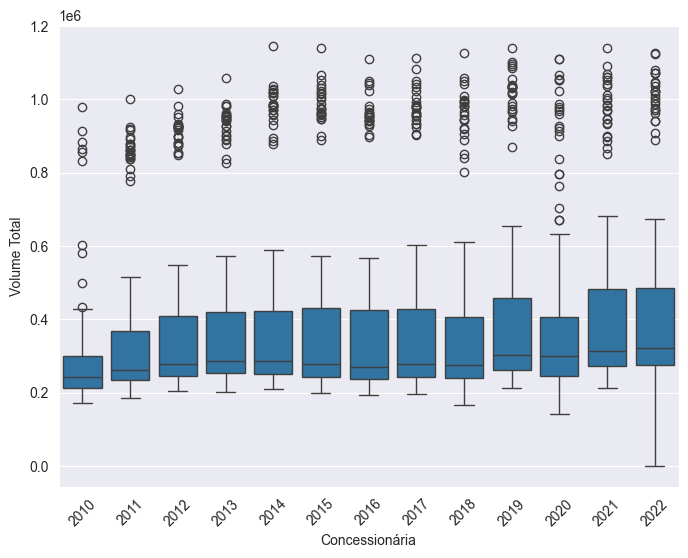

In [49]:
def analise_boxplot(df, coluna):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=coluna, y='Volume_Total', data=df)
    plt.xlabel("Concessionária")
    plt.ylabel("Volume Total")
    plt.xticks(rotation=45) 
    return plt.show()

analise_boxplot(df_pedagio.query('concessionaria == "Fernão Dias"'), 'ano')

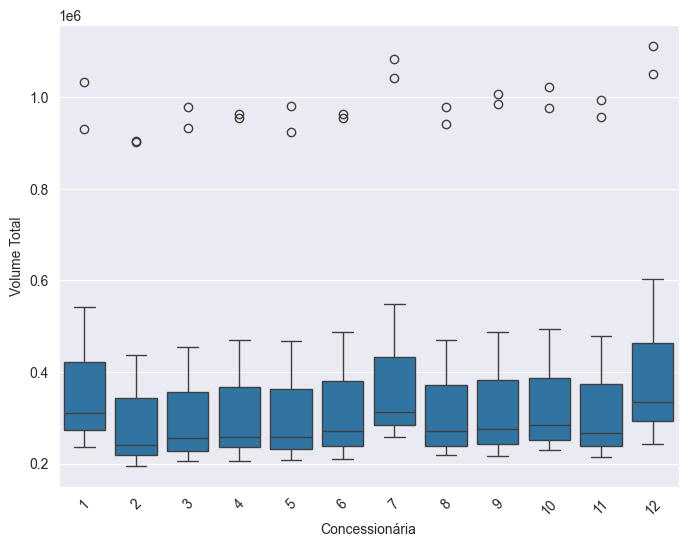

In [50]:
analise_boxplot(df_pedagio.query('concessionaria == "Fernão Dias" and ano == 2017'), 'mes')

Pandemia

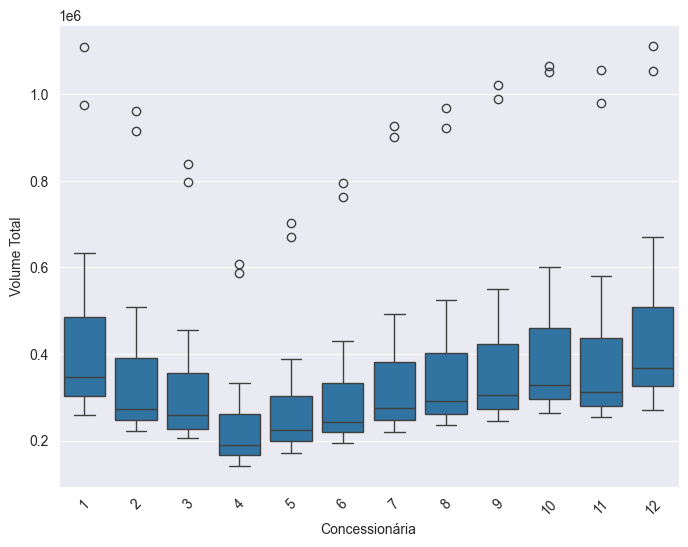

In [51]:
analise_boxplot(df_pedagio.query('concessionaria == "Fernão Dias" and ano == 2020'), 'mes')

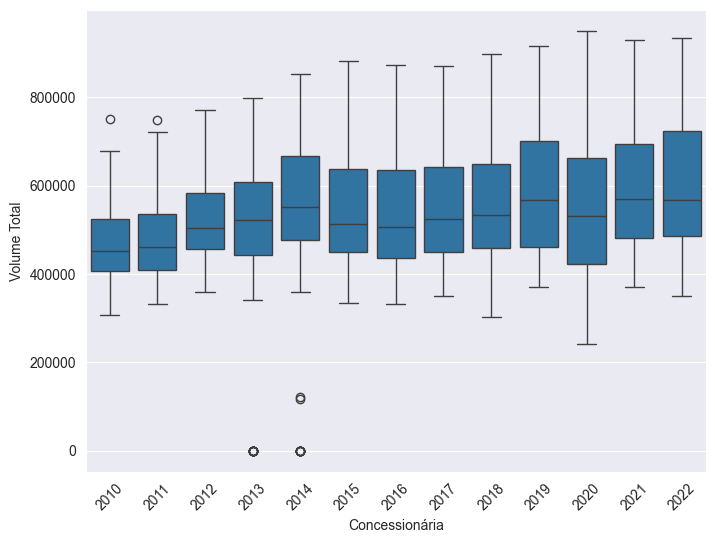

In [52]:
analise_boxplot(df_pedagio.query('concessionaria == "Litoral Sul"'), 'ano')

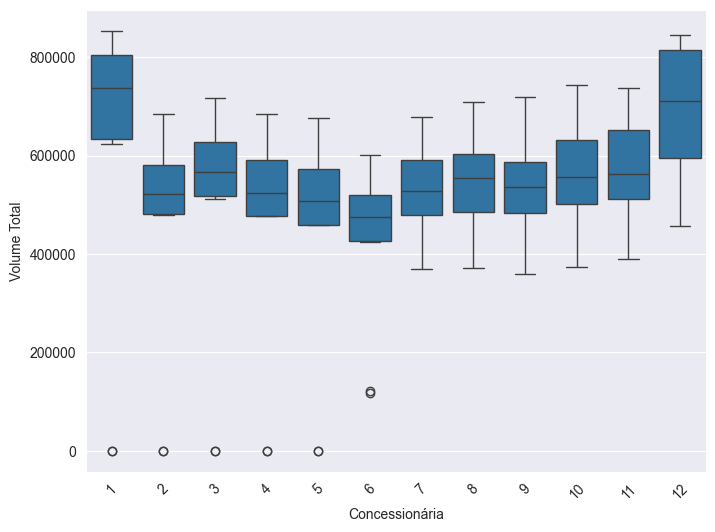

In [53]:
analise_boxplot(df_pedagio.query('concessionaria == "Litoral Sul" and ano ==2014'), 'mes')

No caso da Litoral Sul não há nenhuma justificativa para esses valores tão baixos em 2014, sendo zerado.

In [54]:
df_pedagio.query('Volume_Total > 0 and Volume_Total < 200000 and concessionaria == "Litoral Sul"')

,ano,mes,concessionaria,rodovia,sentido,praca,km_praca,volume_total,volume_veiculo_equivalente,Uniao,Volume_Equivalente,Volume_Total
67094,2014,6,Litoral Sul,BR-101/SC,S,Praça 05,"243,00",76165.0,76165.0,Litoral Sul.Praça 05.2014.6.S,273991.5,122462.0
67095,2014,6,Litoral Sul,BR-101/SC,N,Praça 05,"243,00",72721.0,72721.0,Litoral Sul.Praça 05.2014.6.N,266341.5,118303.0


In [55]:
df_pedagio.loc[(df_pedagio['Volume_Total'] > 0) & (df_pedagio['Volume_Total'] < 200000) & (df_pedagio['concessionaria']  == 'Litoral Sul'), 'Volume_Total'] = 0.0

Todos os valores zerados são colocados no modelo de teste para ser gerado novos valores com base nos dados de treino

In [56]:
import numpy as np

!pip install scikit-learn 24.0
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ERROR: Could not find a version that satisfies the requirement 24.0 (from versions: none)
ERROR: No matching distribution found for 24.0

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
def preencher_nulos(df):
    dados = df[['ano', 'mes', 'concessionaria', 'sentido', 'praca', 'Volume_Equivalente', 'Volume_Total']]
    dados['Volume_Total'] = dados['Volume_Total'].replace(0.0, np.nan)
    
    dados_treino = dados.dropna()
    dados_teste = dados[dados['Volume_Total'].isnull()]
    
    X_treino = dados_treino[['ano', 'mes', 'concessionaria', 'sentido', 'praca']]
    y_treino = dados_treino['Volume_Total']
    X_teste = dados_teste[['ano', 'mes', 'concessionaria', 'sentido', 'praca']]
    
    transformador = ColumnTransformer([('encoder', OneHotEncoder(), ['concessionaria', 'sentido', 'praca'])], remainder='passthrough')
    
    modelo = Pipeline([('transformador', transformador), ('regressao', LinearRegression())])
    modelo.fit(X_treino, y_treino)
    
    previsoes = modelo.predict(X_teste)
    
    dados.loc[dados['Volume_Total'].isnull(), 'Volume_Total'] = previsoes
    return dados

df_pedagio = preencher_nulos(df_pedagio)

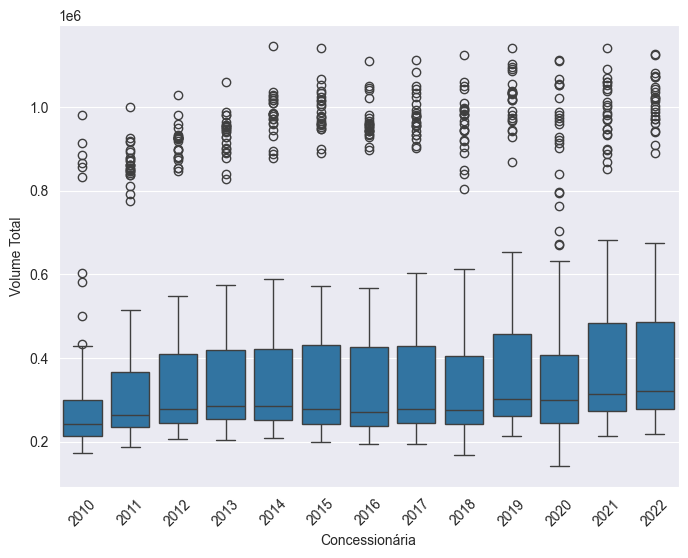

In [58]:
analise_boxplot(df_pedagio.query('concessionaria == "Fernão Dias"'), 'ano')

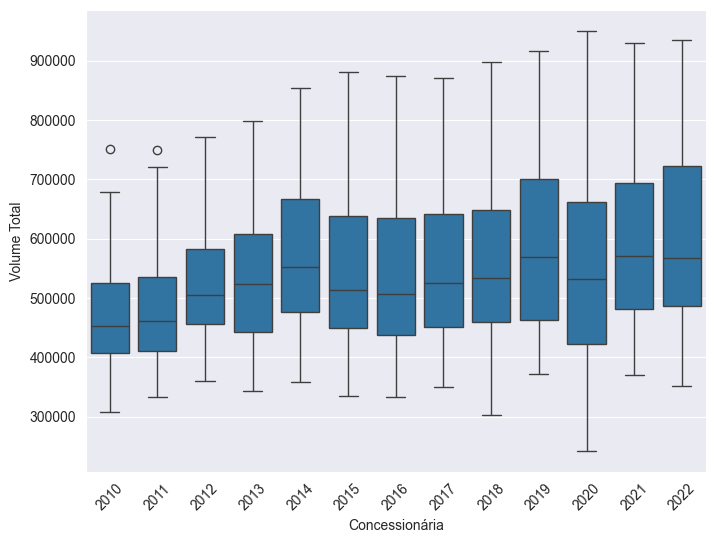

In [59]:
analise_boxplot(df_pedagio.query('concessionaria == "Litoral Sul"'), 'ano')

Definir qual praça o acidente pertence com base no csv ja existente df_km_praca

In [60]:
def incluir_pedagio_acidentes(df):
    df_praca = pd.read_csv('DadosIniciais/Base/df_km_pracas.csv')

    df_auxiliar = df[['OcDataConcessionaria', 'Concessionaria', 'Ano', 'Mes', 'Rodovia', 'Sentido', 'kmmt']]
    df_auxiliar = df_auxiliar.query('Concessionaria == "Fernão Dias" or '
                                    'Concessionaria == "Litoral Sul" or '
                                    'Concessionaria == "Régis Bittencourt"')

    df_auxiliar['Praca_pedagio'] = df_auxiliar.apply(
        lambda row: df_praca.loc[(row['Concessionaria'] == df_praca['Concessionaria']) &
                                 (row['Rodovia'] == df_praca['Rodovia']) &
                                 (row['kmmt'] >= df_praca['Inicio']) &
                                 (row['kmmt'] < df_praca['Fim']), 'Praça'].
        values[0] if not df_praca.loc[(row['Concessionaria'] == df_praca['Concessionaria']) &
                                      (row['Rodovia'] == df_praca['Rodovia']) &
                                      (row['kmmt'] >= df_praca['Inicio']) &
                                      (row['kmmt'] < df_praca['Fim']), 'Praça'].empty else None, axis=1)

    return df_auxiliar

df_acidentes = pd.read_csv('Arquivos/df_acidentes.csv')

df_acidentes = incluir_pedagio_acidentes(df_acidentes)

Unir os dados de acidentes com os dados de volume com base na praça, sentido, mes, ano e concessionaria

In [61]:
def uniao_volume_acidentes(df_pedagio, df):
    df_pedagio['Uniao'] = df_pedagio['concessionaria'].astype(str) + '.' + df_pedagio['praca'].astype(str) + '.' + df_pedagio['ano'].astype(str) + '.' + df_pedagio['mes'].astype(str) + '.' + df_pedagio['sentido'].astype(str)

    df_auxiliar = df_pedagio[['Uniao', 'Volume_Equivalente', 'Volume_Total']]

    df['Uniao'] = df['Concessionaria'].astype(str) + '.' + df['Praca_pedagio'].astype(str) + '.' + df['Ano'].astype(str) + '.' + df['Mes'].astype(str) + '.' + df['Sentido'].astype(str)
    df['Mes_Ano'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')
    df = df[['OcDataConcessionaria', 'Mes_Ano', 'Uniao', 'Praca_pedagio']]

    df = pd.merge(df, df_auxiliar, on='Uniao', how='left')

    df.drop(columns=['Uniao'], axis=1, inplace=True)

    df_acidentes = pd.read_csv('Arquivos/df_acidentes.csv', encoding='utf-8')
    df_acidentes = pd.merge(df_acidentes, df, on='OcDataConcessionaria', how='left')

    return df_acidentes

df_acidentes = uniao_volume_acidentes(df_pedagio, df_acidentes)

Os dados abertos da ANTT tambem tem os dados das marginais, como km inicial e final, ano de construção. Será incluido no modelo.

In [62]:
marginal = pd.read_csv('DadosIniciais/Base/Marginais.csv', sep=";", encoding='latin1')
marginal.head(5)

,concessionaria,ano_do_pnv_snv,rodovia_uf,sentido,km_m_inicial,latitude_inicial,latitude_final,km_m_final,longitude_inicial,longitude_final
0,AUTOPISTA FERNÃO DIAS,2007,BR-381/MG,Crescente,"588,732","-20,539507","-20,544517","589,857","-44,641545","-44,647932"
1,AUTOPISTA FERNÃO DIAS,2007,BR-381/MG,Crescente,"676,100","-21,096877","-21,106390","677,511","-45,081658","-45,091027"
2,AUTOPISTA FERNÃO DIAS,2007,BR-381/MG,Crescente,"684,470","-21,161326","-21,164419","685,092","-45,119954","-45,124892"
3,AUTOPISTA FERNÃO DIAS,2007,BR-381/MG,Crescente,"723,068","-21,448824","-21,454536","723,701","-45,212246","-45,214782"
4,AUTOPISTA FERNÃO DIAS,2007,BR-381/MG,Crescente,"753,510","-21,665307","-21,668957","755,132","-45,310256","-45,326629"


Alterando os nomes das concessionarias

In [ ]:
def definir_concessionaria(df):
    df = df.query(
        'concessionaria == "AUTOPISTA FERNÃO DIAS" or concessionaria == "AUTOPISTA FLUMINENSE" or concessionaria == "AUTOPISTA LITORAL SUL" or concessionaria == "AUTOPISTA PLANALTO SUL" or concessionaria == "AUTOPISTA REGIS BITTENCOURT"')

    concessionaria = {'AUTOPISTA FLUMINENSE': 'Fluminense',
                      'AUTOPISTA PLANALTO SUL': 'Planalto Sul',
                      'AUTOPISTA FERNÃO DIAS': 'Fernão Dias',
                      'AUTOPISTA LITORAL SUL': 'Litoral Sul',
                      'AUTOPISTA REGIS BITTENCOURT': 'Régis Bittencourt'}
    df['concessionaria'].replace(concessionaria, inplace=True)

    return df

marginal = definir_concessionaria(marginal)

In [ ]:
def formatar_colunas(df):
    df.drop(columns=['latitude_inicial', 'latitude_final', 'longitude_inicial', 'longitude_final'], inplace=True)
    df['sentido'].replace({'Decrescente': 'N', 'Crescente': 'S'}, inplace=True)

    df[['km_m_inicial', 'km_m_final']] = df[['km_m_inicial', 'km_m_final']].map(
        lambda x: x.replace(',', '.') if isinstance(x, str) and ',' in x else x)
    df[['km_m_inicial', 'km_m_final']] = df[['km_m_inicial', 'km_m_final']].astype(float)

    return df

marginal = formatar_colunas(marginal)

Alterando os nomes das rodovias para o padrão

In [65]:
def substituir_concessionaria(row):
    if row['concessionaria'] == 'Litoral Sul':
        return row['rodovia_uf'].replace('BR-101/SC', 'BR101').replace('BR-116/PR', 'BR116').replace('BR-376/PR','BR376')

    elif row['concessionaria'] == 'Fernão Dias':
        return row['rodovia_uf'].replace('BR-381/MG', 'MG-BR381').replace('BR-381/SP', 'SP-BR381')

    elif row['concessionaria'] == 'Régis Bittencourt':
        return row['rodovia_uf'].replace('CW-116/PR', 'CW-BR116').replace('BR-116/SP', 'SP-BR116')

    elif row['concessionaria'] == 'Fluminense':
        return row['rodovia_uf'].replace('BR-101/RJ', 'BR101')

    else:
        return row['rodovia_uf'].replace('BR-116/PR', 'BR116/PR').replace('BR-116/SC', 'BR116/SC')
    
marginal['rodovia_uf'] = marginal.apply(substituir_concessionaria, axis=1)
marginal['rodovia_uf'].value_counts()

rodovia_uf
BR101          131
MG-BR381        58
SP-BR381        26
BR116/SC        25
BR376           24
SP-BR116        23
BR116/PR        17
BR116           16
CW-BR116         9
Contorno/MG      2
Name: count, dtype: int64

Mesclando os dados de acidentes com marginal

In [66]:
def get_ano_marginal(row):
    filtro = ((marginal['concessionaria'] == row['Concessionaria']) &
              (row['Rodovia'] == marginal['rodovia_uf']) &
              (row['kmmt'] >= marginal['km_m_inicial']) &
              (row['kmmt'] < marginal['km_m_final']))

    dados = marginal.loc[filtro, 'ano_do_pnv_snv']

    if not dados.empty:
        return dados.values[0]
    else:
        return None


df_acidentes['Ano_Marginal'] = df_acidentes.apply(get_ano_marginal, axis=1)
df_acidentes['Marginal'] = np.where(df_acidentes['Ano_Marginal'] > 2007, True, False)
df_acidentes.drop_duplicates(subset='OcDataConcessionaria', inplace=True)

df_acidentes.to_csv('Arquivos/df_acidentes_volume.csv', index=False, encoding='utf-8')

In [68]:
df_acidentes.drop(columns='Veiculos').head()

,NumOcorrencia,DataOcorrencia,DescrOcorrencia,Sentido,Rodovia,Numveic,Ilesos,VitimasLeves,VitimasModeradas,VitimasGraves,...,Motocicleta,Veiculo_Leve,Veiculo_Pesado,Veiculo_Passageiro,Mes_Ano,Praca_pedagio,Volume_Equivalente,Volume_Total,Ano_Marginal,Marginal
0,15,2009-01-01,Acidente com VITIMA,S,BR101,1.0,NaN,1.0,NaN,NaN,...,True,False,False,False,2009-01-01,Praça 04,NaN,NaN,NaN,False
1,31,2009-01-01,Acidente com VITIMA,N,BR101,2.0,2.0,NaN,1.0,NaN,...,True,False,False,False,2009-01-01,Praça 03,NaN,NaN,NaN,False
2,231,2009-01-06,Acidente com VITIMA,S,BR101,1.0,NaN,1.0,NaN,NaN,...,True,False,False,False,2009-01-01,Praça 05,NaN,NaN,2009.0,True
3,150,2009-01-04,Acidente com Danos Materiais,S,BR376,1.0,1.0,NaN,NaN,NaN,...,True,False,False,False,2009-01-01,Praça 02,NaN,NaN,NaN,False
4,36,2009-01-07,Acidente com VITIMA,S,BR101,1.0,NaN,1.0,NaN,NaN,...,True,False,False,False,2009-01-01,Praça 04,NaN,NaN,NaN,False
